In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")


In [5]:
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [6]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]


In [7]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [8]:
df.dtypes


Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [9]:
df = df.set_index(df["date_index"])


In [10]:
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [11]:
df["Date_month_year"].value_counts()[:3]


2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

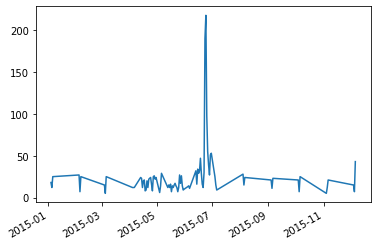

In [12]:
df["Date_month_year"].value_counts().plot();


In [13]:
f = df.groupby(pd.Grouper(freq="M")).size()


In [14]:
f.head()


date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

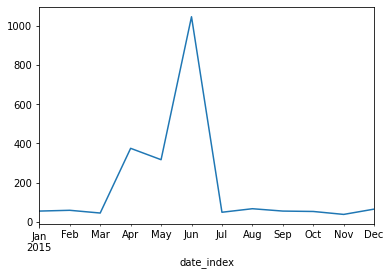

In [15]:
df.groupby(pd.Grouper(freq="M")).size().plot()


In [16]:
df.Status.unique()


array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]


In [18]:
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [19]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]


,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [20]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

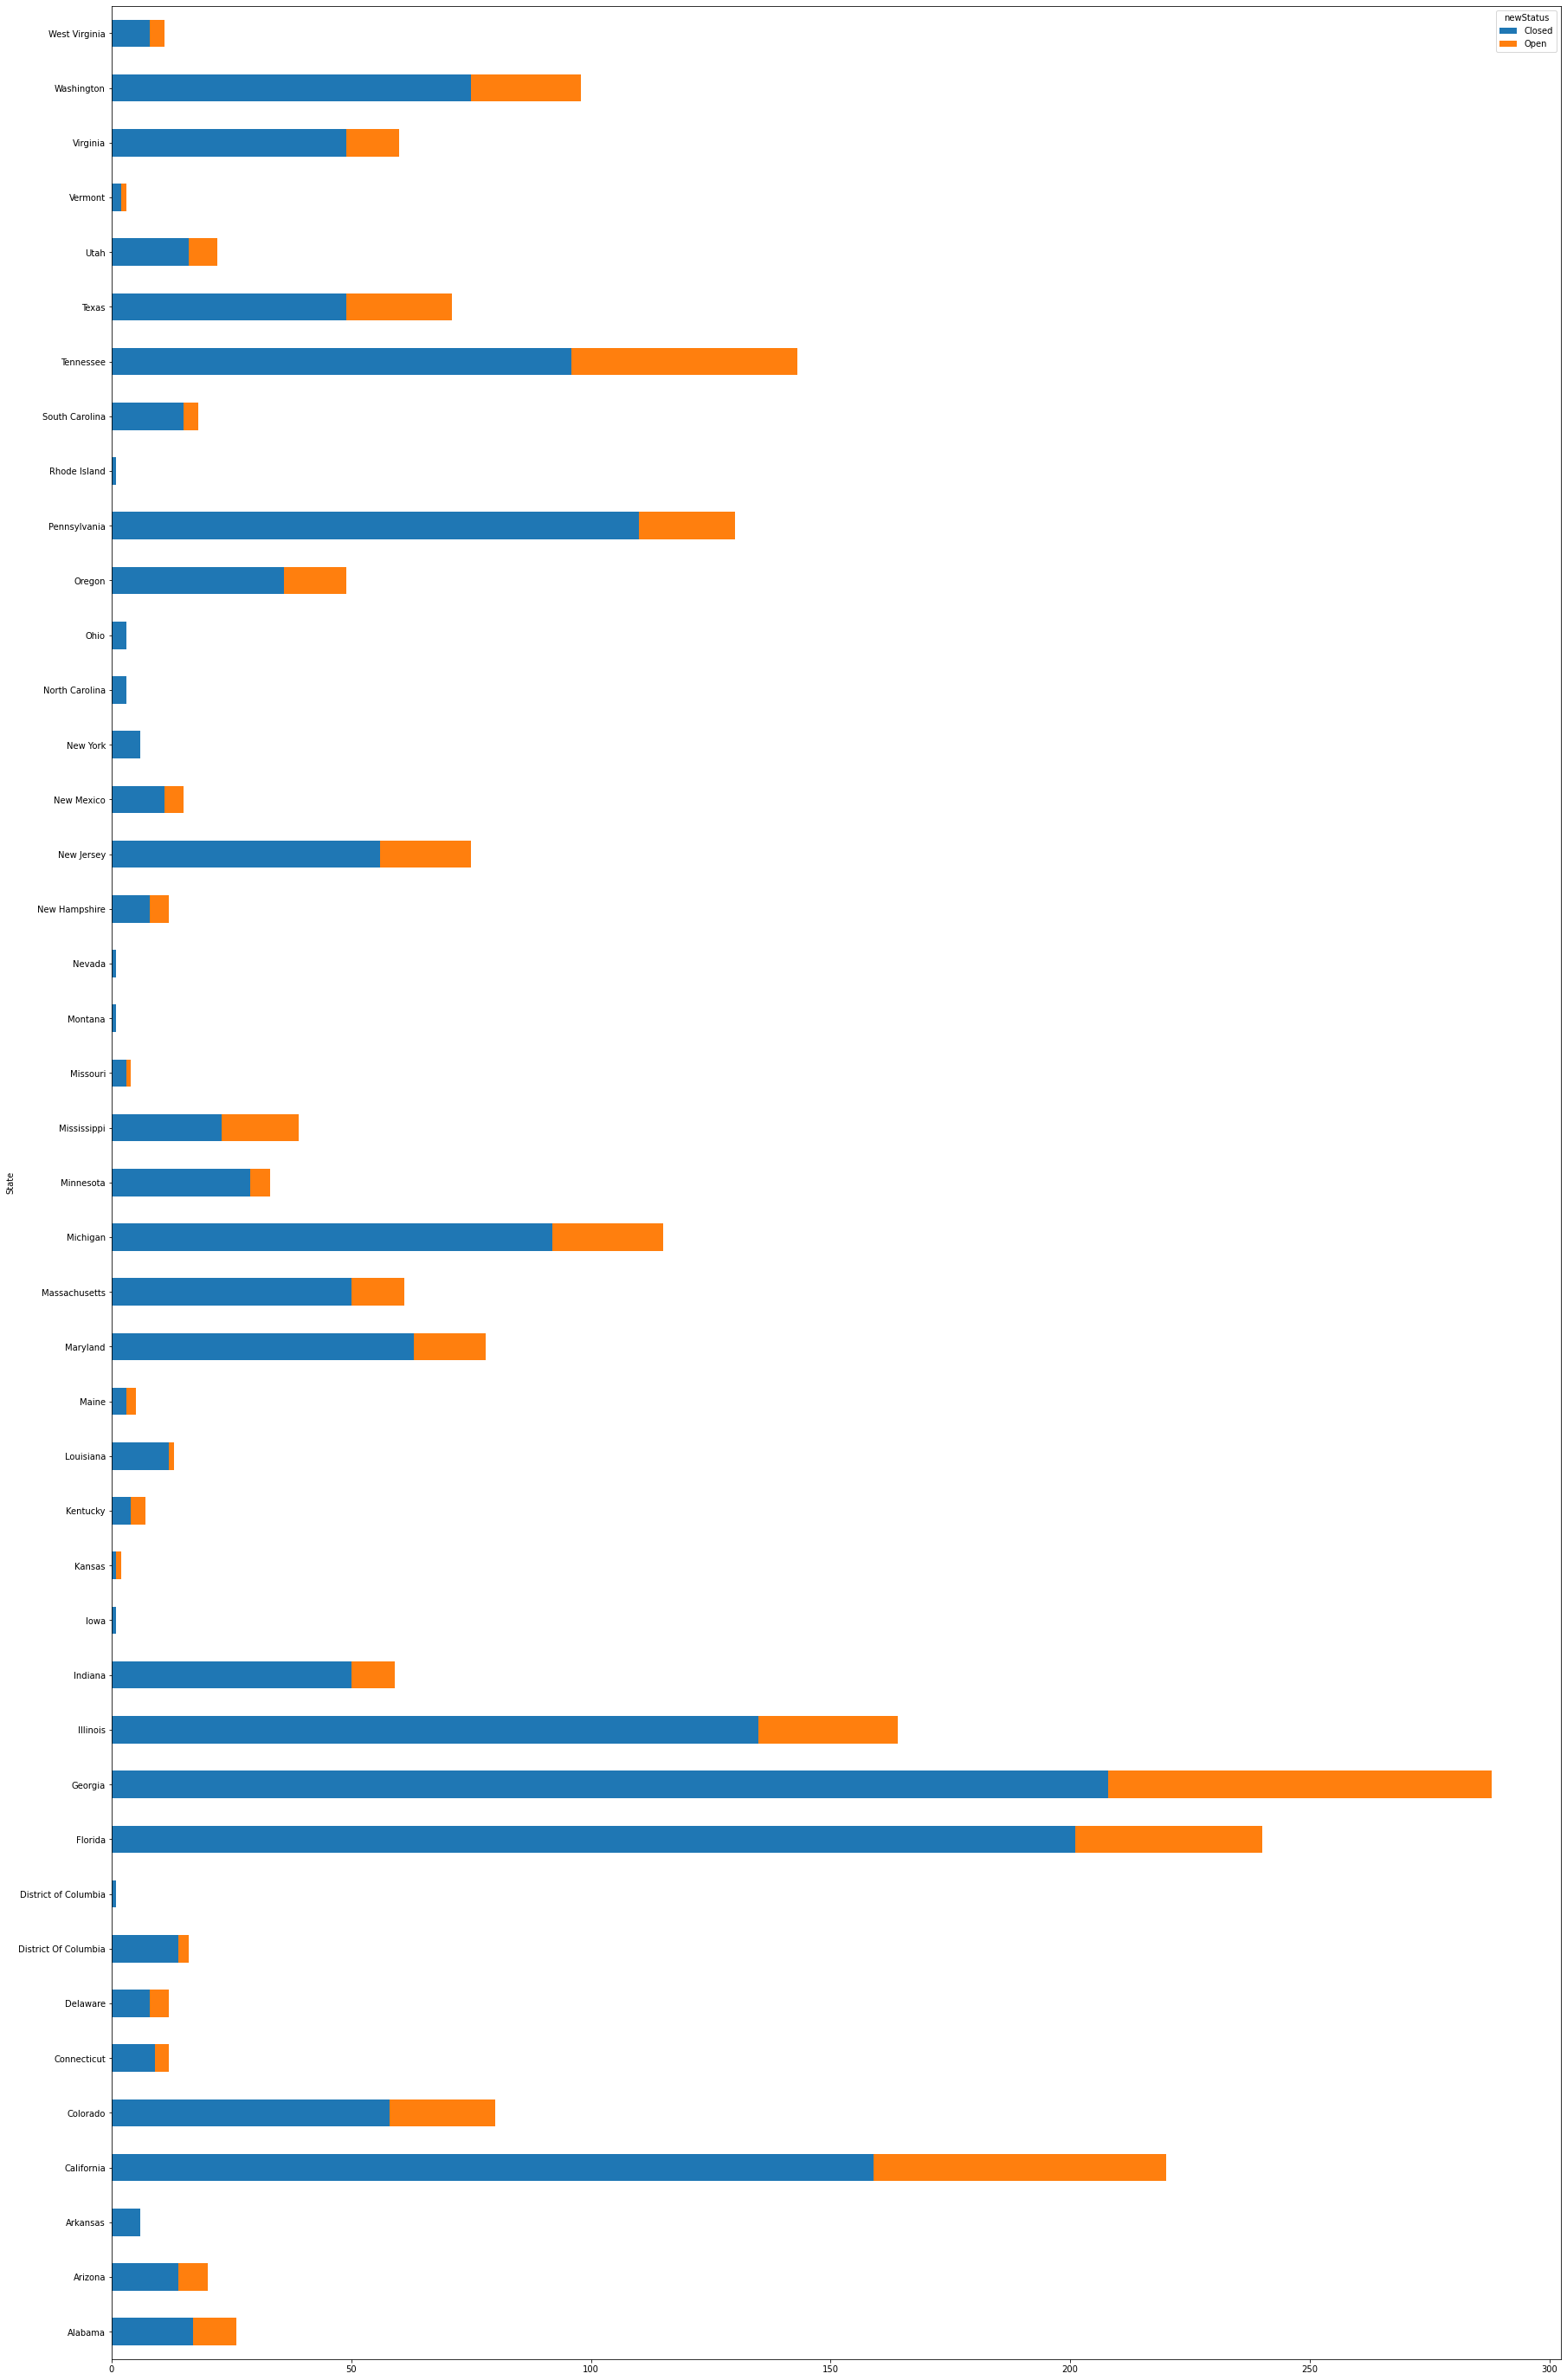

In [21]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)


In [22]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()


State    West Virginia
Count              288
dtype: object

In [23]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()


newStatus
Closed    208.0
Open       80.0
dtype: float64

In [24]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [25]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [26]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [27]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [28]:
import gensim
from gensim import corpora

In [29]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [30]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [31]:
from gensim.models import LdaModel


In [32]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [33]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.081*"practice" + 0.060*"billing" + 0.056*"unfair" + 0.042*"price" + 0.031*"monopolistic" + 0.031*"bill" + 0.031*"service" + 0.028*"connection" + 0.026*"high" + 0.019*"paying"')

(1, '0.318*"internet" + 0.116*"comcast" + 0.082*"service" + 0.065*"speed" + 0.033*"slow" + 0.020*"cable" + 0.017*"problem" + 0.016*"fee" + 0.010*"month" + 0.010*"phone"')

(2, '0.140*"comcast" + 0.091*"charge" + 0.056*"bill" + 0.027*"credit" + 0.023*"payment" + 0.022*"account" + 0.020*"email" + 0.017*"unauthorized" + 0.017*"option" + 0.016*"tucson"')

(3, '0.184*"comcast" + 0.151*"billing" + 0.071*"issue" + 0.066*"service" + 0.021*"customer" + 0.016*"without" + 0.014*"terrible" + 0.013*"charging" + 0.012*"price" + 0.009*"equipment"')

(4, '0.187*"data" + 0.168*"cap" + 0.140*"comcast" + 0.026*"charge" + 0.019*"fraudulent" + 0.018*"overage" + 0.015*"incorrect" + 0.012*"back" + 0.009*"overcharge" + 0.009*"lied"')

(5, '0.115*"speed" + 0.082*"throttling" + 0.032*"promised" + 0.027*"cramming" + 0.020*"low" + 

In [34]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [35]:
pd.DataFrame(word_dict)


,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,practice,internet,comcast,comcast,data,speed,comcast,service,comcast
1,billing,comcast,charge,billing,cap,throttling,service,poor,xfinity
2,unfair,service,bill,issue,comcast,promised,complaint,get,pricing
3,price,speed,credit,service,charge,cramming,customer,charged,usage
4,monopolistic,slow,payment,customer,fraudulent,low,contract,comcast,comcastxfinity
5,bill,cable,account,without,overage,time,help,home,deceptive
6,service,problem,email,terrible,incorrect,outage,2,billed,data
7,connection,fee,unauthorized,charging,back,scam,business,year,switch
8,high,month,option,price,overcharge,disconnection,show,modem,access
9,paying,phone,tucson,equipment,lied,promotion,bill,fee,false
